In [1]:
import json
import plotly
import pandas as pd
import joblib
import numpy as np
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from flask import Flask
from flask import render_template, request, jsonify
from plotly.graph_objs import Bar
from sqlalchemy import create_engine

In [2]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [62]:
# load data
engine = create_engine('sqlite:///data/DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse.db', engine)

# load model
model = joblib.load("models/classifier.pkl")

In [63]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.shape

(26216, 39)

In [33]:
genre_counts = df.groupby('genre').count()['message']
genre_names = list(genre_counts.index)

In [34]:
genre_counts

genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64

In [35]:
genre_names

['direct', 'news', 'social']

In [128]:
numeric_df = df.drop(['id', 'message', 'original', 'genre'], axis=1)#.sum().reset_index()
numeric_df.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
numeric_sum = numeric_df.sum(numeric_only = True)

In [130]:
numeric_sum_df = numeric_sum.to_frame()

In [131]:
numeric_sum_df.reset_index(inplace=True)
numeric_sum_df = numeric_sum_df.rename(columns = {'index':'category', 0: 'count'})

In [132]:
numeric_sum_df.head()

,category,count
0,related,20094
1,request,4474
2,offer,118
3,aid_related,10860
4,medical_help,2084


In [134]:
numeric_sum_df = numeric_sum_df.sort_values(by = 'count', ascending = False)

In [135]:
top_ten = numeric_sum_df[0:10]

In [137]:
top_ten

,category,count
0,related,20094
3,aid_related,10860
27,weather_related,7297
34,direct_report,5075
1,request,4474
17,other_aid,3446
10,food,2923
31,earthquake,2455
29,storm,2443
11,shelter,2314


In [120]:
import seaborn as sns

<AxesSubplot: xlabel='count', ylabel='category'>

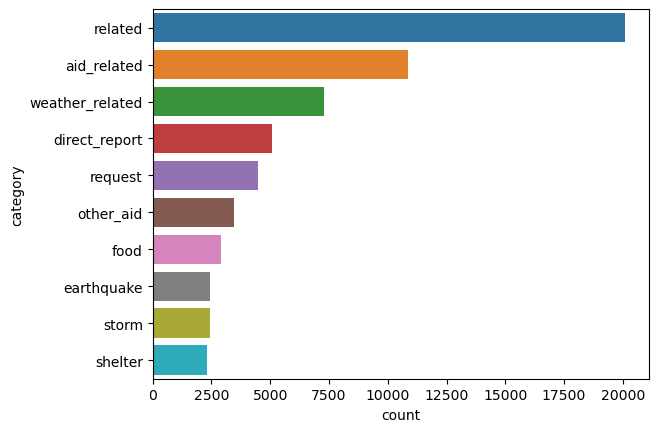

In [138]:
sns.barplot(data = top_ten, y = 'category', x = 'count')

In [139]:
bottom_ten = numeric_sum_df[-11:]

In [140]:
bottom_ten

,category,count
21,electricity,532
32,cold,530
7,security,471
12,clothing,405
25,aid_centers,309
14,missing_people,298
23,hospitals,283
30,fire,282
22,tools,159
24,shops,120


<AxesSubplot: xlabel='count', ylabel='category'>

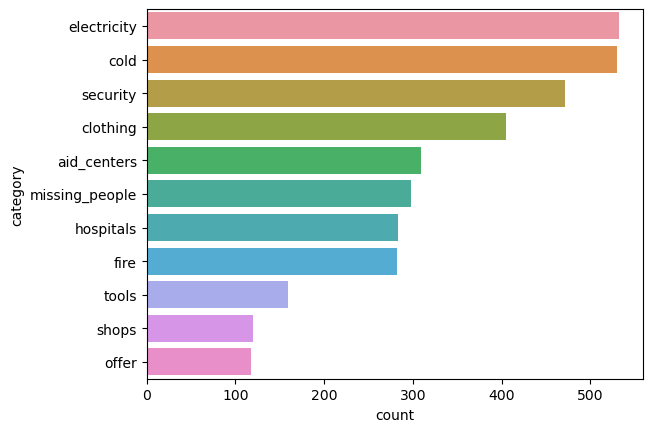

In [141]:
sns.barplot(data = bottom_ten, y = 'category', x = 'count')